In [345]:
!pip install yellowbrick
!pip install geopandas

In [377]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px



In [378]:
# Load Data

df_minmax = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_minmax.csv")
df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/df_standard.csv")
pca4_df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca4_df_standard.csv")
pca5_df_standard = pd.read_csv(r"/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/pca5_df_standard.csv")
data = pd.read_csv(r'/Users/eryclisrodrigues/Documents/Eryclis - docs/Data Science/Personal Projects - Kaggle, Github, others/Unsupervised Learning - Fund Allocation For Countries in Need/archive/data.csv')

In [379]:
data_numerical = data.drop('country', axis=1)

#### 5.1. Model Set Up - K-Means

K-Means Clustering is a distance-based algorithm used for unsupervised learning, particularly effective for numerical data as it doesn't support categorical features.

This algorithm is widely preferred for unsupervised learning tasks, employing a mathematical approach to discover clusters within the data through the following steps:

1. Randomly selects two centroids (assuming k=2).
2. Calculates the distance between the centroids and all data points.
3. Labels each data point based on its proximity to a centroid.
4. Computes the average value of data points assigned to each centroid, defining new clusters.
5. Iterates this process until both centroids converge to fixed points.
6. The hyperparameter k defines the number of clusters. Two statistical tests are commonly employed for selecting the optimal k value:

- Elbow Method: Plots the sum of squared error for various k values. The optimal k is where the plot resembles an elbow, indicating a point where the inertia starts decreasing linearly.
- Silhouette Score Method: Evaluates cluster quality by assessing how well data points cluster with others that are similar. The k value yielding the highest score is selected for modeling.

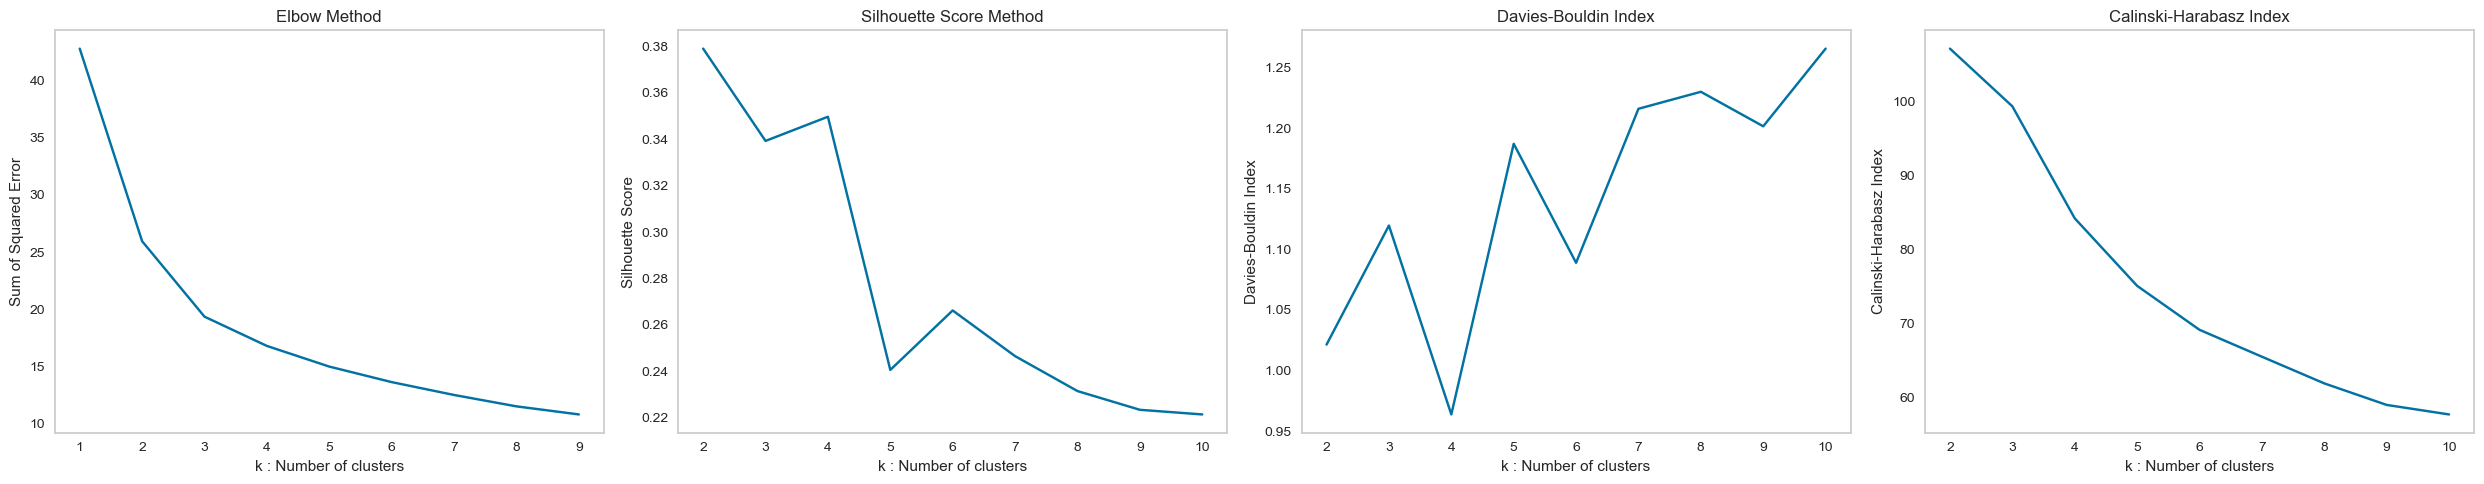

In [380]:
# Using df_minimax

# List to store the index values
db_scores = []
ch_scores = []

# Elbow Method
sse = {}
sil = []
kmax = 10

# Create figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_minmax)
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=axs[0])
axs[0].set_title('Elbow Method')
axs[0].set_xlabel("k : Number of clusters")
axs[0].set_ylabel("Sum of Squared Error")
axs[0].grid()

# Silhouette Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_minmax)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_minmax, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil, ax=axs[1])
axs[1].set_title('Silhouette Score Method')
axs[1].set_xlabel("k : Number of clusters")
axs[1].set_ylabel("Silhouette Score")
axs[1].grid()

# Davies-Bouldin Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_minmax)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(df_minmax, labels)
    db_scores.append(db_score)
sns.lineplot(x=range(2, kmax + 1), y=db_scores, ax=axs[2])
axs[2].set_title('Davies-Bouldin Index')
axs[2].set_xlabel("k : Number of clusters")
axs[2].set_ylabel("Davies-Bouldin Index")
axs[2].grid()

# Calinski-Harabasz Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_minmax)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(df_minmax, labels)
    ch_scores.append(ch_score)
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, ax=axs[3])
axs[3].set_title('Calinski-Harabasz Index')
axs[3].set_xlabel("k : Number of clusters")
axs[3].set_ylabel("Calinski-Harabasz Index")
axs[3].grid()

plt.tight_layout()
plt.show()


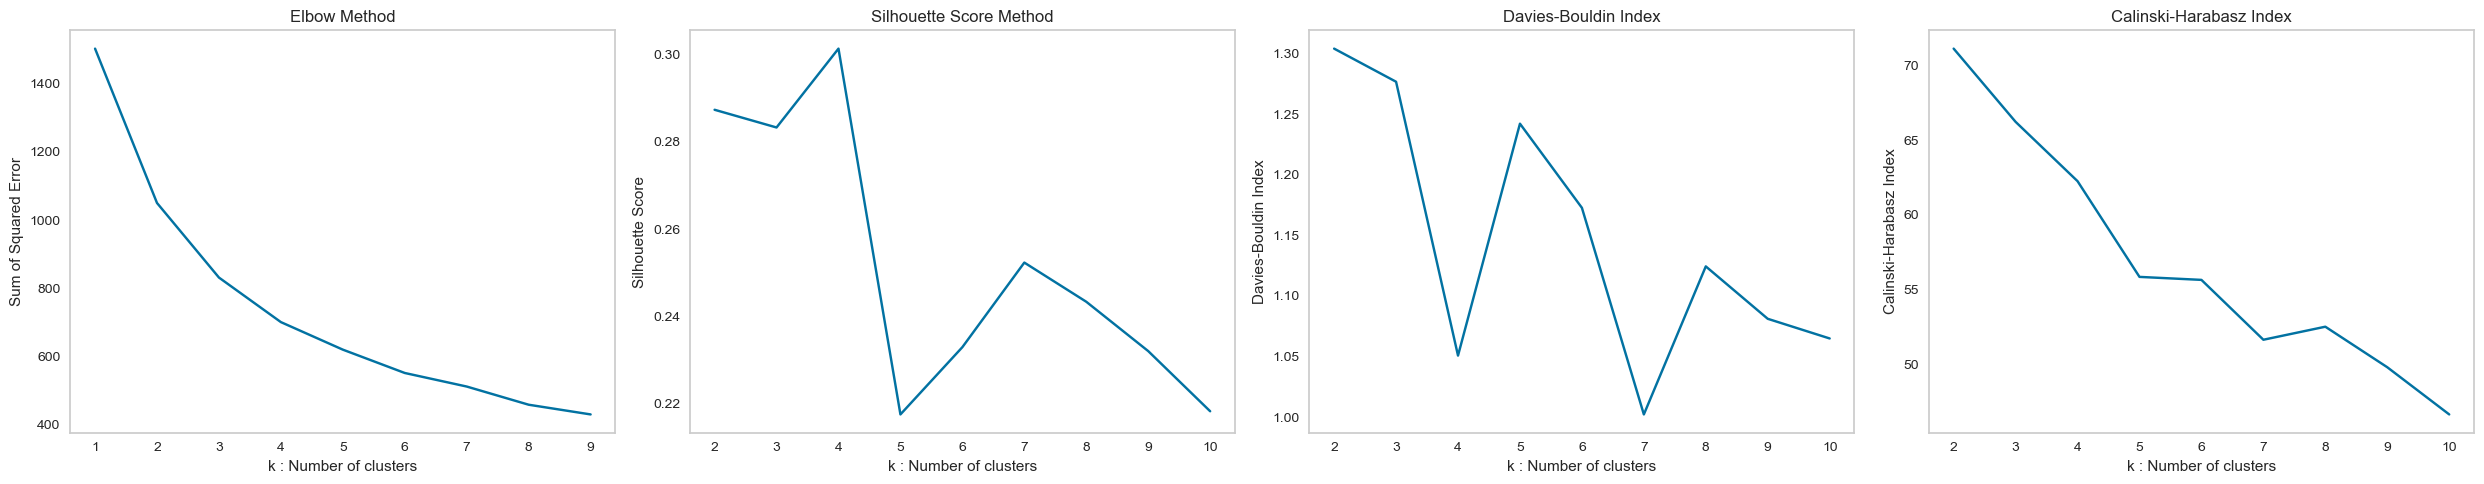

In [381]:
# List to store the index values
db_scores = []
ch_scores = []

# Elbow Method and Silhouette
sse = {}
sil = []
kmax = 10

# Create figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_standard)
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=axs[0])
axs[0].set_title('Elbow Method')
axs[0].set_xlabel("k : Number of clusters")
axs[0].set_ylabel("Sum of Squared Error")
axs[0].grid()

# Silhouette Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_standard)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_standard, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil, ax=axs[1])
axs[1].set_title('Silhouette Score Method')
axs[1].set_xlabel("k : Number of clusters")
axs[1].set_ylabel("Silhouette Score")
axs[1].grid()

# Davies-Bouldin Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_standard)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(df_standard, labels)
    db_scores.append(db_score)
sns.lineplot(x=range(2, kmax + 1), y=db_scores, ax=axs[2])
axs[2].set_title('Davies-Bouldin Index')
axs[2].set_xlabel("k : Number of clusters")
axs[2].set_ylabel("Davies-Bouldin Index")
axs[2].grid()

# Calinski-Harabasz Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(df_standard)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(df_standard, labels)
    ch_scores.append(ch_score)
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, ax=axs[3])
axs[3].set_title('Calinski-Harabasz Index')
axs[3].set_xlabel("k : Number of clusters")
axs[3].set_ylabel("Calinski-Harabasz Index")
axs[3].grid()

plt.tight_layout()
plt.show()


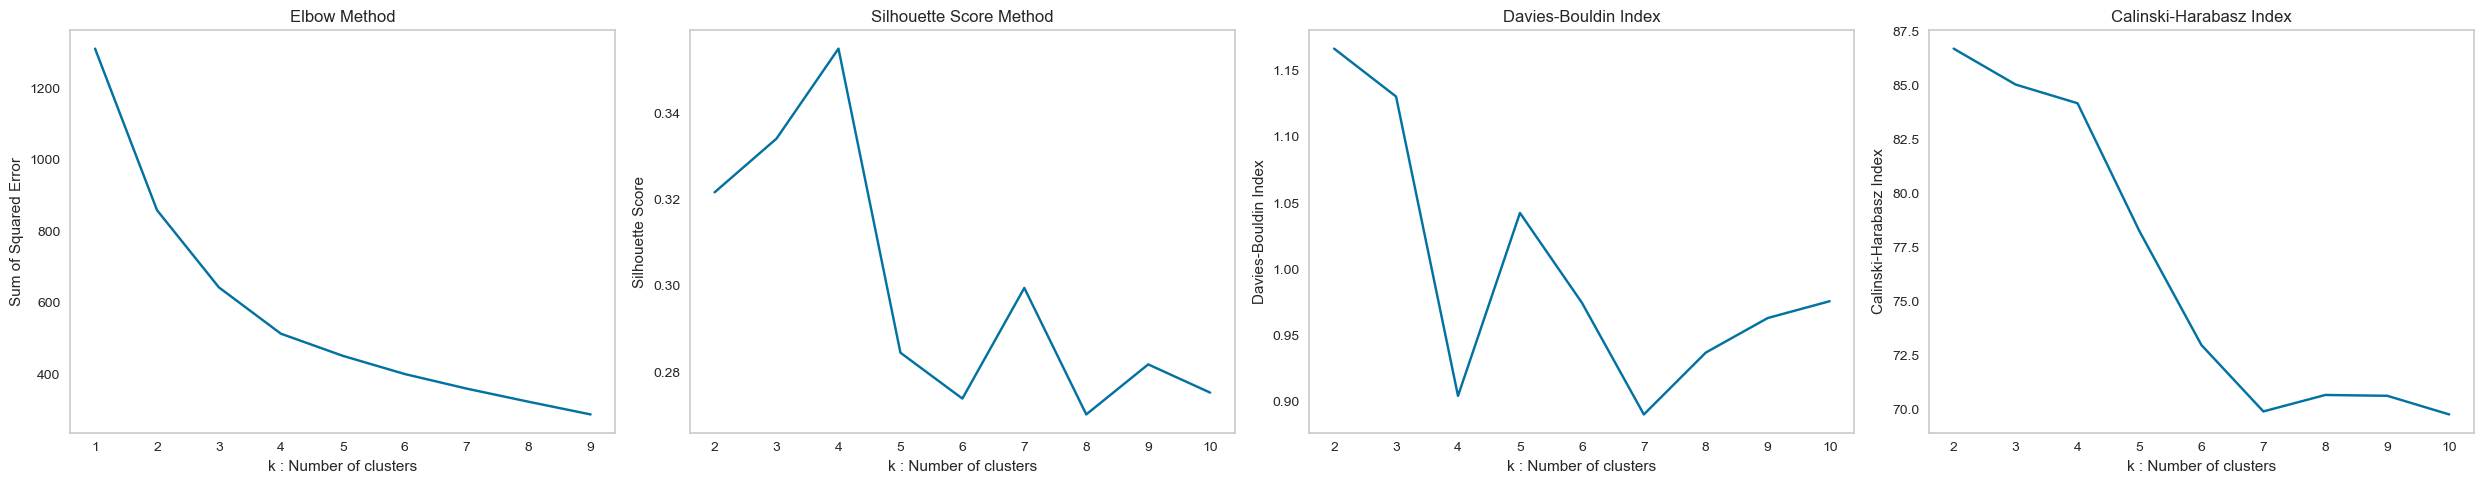

In [382]:
# List to store the index values
db_scores = []
ch_scores = []

# Elbow Method and Silhouette
sse = {}
sil = []
kmax = 10

# Create figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca4_df_standard)
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=axs[0])
axs[0].set_title('Elbow Method')
axs[0].set_xlabel("k : Number of clusters")
axs[0].set_ylabel("Sum of Squared Error")
axs[0].grid()

# Silhouette Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(pca4_df_standard)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca4_df_standard, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil, ax=axs[1])
axs[1].set_title('Silhouette Score Method')
axs[1].set_xlabel("k : Number of clusters")
axs[1].set_ylabel("Silhouette Score")
axs[1].grid()

# Davies-Bouldin Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(pca4_df_standard)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(pca4_df_standard, labels)
    db_scores.append(db_score)
sns.lineplot(x=range(2, kmax + 1), y=db_scores, ax=axs[2])
axs[2].set_title('Davies-Bouldin Index')
axs[2].set_xlabel("k : Number of clusters")
axs[2].set_ylabel("Davies-Bouldin Index")
axs[2].grid()

# Calinski-Harabasz Index
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(pca4_df_standard)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(pca4_df_standard, labels)
    ch_scores.append(ch_score)
sns.lineplot(x=range(2, kmax + 1), y=ch_scores, ax=axs[3])
axs[3].set_title('Calinski-Harabasz Index')
axs[3].set_xlabel("k : Number of clusters")
axs[3].set_ylabel("Calinski-Harabasz Index")
axs[3].grid()

plt.tight_layout()
plt.show()


#### K=3 is the best number os clusters

In [383]:
km_3 = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [384]:
# Run model with different versions of the dataset

y_predicted_minmax = km_3.fit_predict(df_minmax)
y_predicted_standard = km_3.fit_predict(df_standard)
y_predicted_pca4_standard = km_3.fit_predict(pca4_df_standard)
y_predicted_pc5_standard = km_3.fit_predict(pca5_df_standard)

In [385]:
# Calculate Silhoutte Score - normalised
score = silhouette_score(df_minmax, km_3.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(df_minmax, km_3.labels_)
print('Davies-Bouldin Score: %.3f' % davies_bouldin)

# Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(df_minmax, km_3.labels_)
print('Calinski-Harabasz Score: %.3f' % calinski_harabasz)



Silhouette Score: 0.332
Davies-Bouldin Score: 1.129
Calinski-Harabasz Score: 98.379


In [386]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_standard, km_3.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(df_standard, km_3.labels_)
print('Davies-Bouldin Score: %.3f' % davies_bouldin)

# Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(df_standard, km_3.labels_)
print('Calinski-Harabasz Score: %.3f' % calinski_harabasz)



Silhouette Score: 0.283
Davies-Bouldin Score: 1.277
Calinski-Harabasz Score: 66.235


In [387]:
# Calculate Silhoutte Score - stardardised + PCA4
score = silhouette_score(pca4_df_standard, km_3.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(pca4_df_standard, km_3.labels_)
print('Davies-Bouldin Score: %.3f' % davies_bouldin)

# Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(pca4_df_standard, km_3.labels_)
print('Calinski-Harabasz Score: %.3f' % calinski_harabasz)



Silhouette Score: 0.332
Davies-Bouldin Score: 1.133
Calinski-Harabasz Score: 85.015


##### Silhouette Score: 
 Higher scores (close to +1) indicate well-separated clusters with instances tightly grouped within clusters. 
 Scores near 0 suggest cluster overlap, while negative scores indicate potential misassignment of instances.

##### Davies-Bouldin Score:
 Lower values (close to zero) are better. It indicates well-separated clusters with high intra-cluster cohesion and low inter-cluster separation.

 ##### Calinski-Harabasz Score:
 Higher scores are better. It measures the ratio of intra-cluster dispersion to inter-cluster dispersion. 
 A higher value suggests denser and well-defined clusters.

Metrics:

- Silhouette Score: 0.332
-- Interpretation: The silhouette score of 0.332 indicates reasonably well-separated clusters, with instances tightly grouped within clusters.
- Davies-Bouldin Score: 1.133
-- Interpretation: The Davies-Bouldin score of 1.133 suggests that the clusters have relatively low intra-cluster cohesion and moderate inter-cluster separation.
- Calinski-Harabasz Score: 85.015
-- Interpretation: The Calinski-Harabasz score of 85.015 indicates relatively dense and well-defined clusters, as it measures the ratio of intra-cluster dispersion to inter-cluster dispersion.
These metrics provide quantitative insights into the performance and quality of the clustering model, facilitating a better understanding of the clusters' characteristics and their potential applications in decision-making processes.

In [388]:
data_pca5 = data_numerical.copy()

In [401]:
# add the cluster column to the dataframe 


df_minmax['cluster'] = y_predicted_minmax
df_standard['cluster'] = y_predicted_standard
data_numerical['cluster'] = y_predicted_pca4_standard
data['cluster'] = y_predicted_pca4_standard
data_pca5['cluster'] = y_predicted_pc5_standard

In [402]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  cluster cluster_label  
0         9.44       56.20       5.82    553        2     Cluster_2  
1         4.49       76.30       1.65   4090        1     Cluster_1  
2        16.10       76.50       2.89   4460        1     Cluster_1  
3        22.40       60.10       6.16   3530        2     Cluster_2  
4         1.44       76.80       2.13  12200        1     Cluster_1  
..         ...         ...        ...    ...      ...           ...  
162       2.62       63.00       3.50   2970        1     Cluster_1  
163      45.90       75.40       2.47  13500        1     Cluster_1  
164      12.10       73.10       1.95   1310        1     Cluster_1  
165      23.60       67.50       4.67   1310        2     Cluster_2  
166      14.00       52.00       5.40   1460        2     Cluster_2  

[167 rows x 12 columns]

#### Findings:

We will use 4 clusters

#### 5.3. Cluster plotting and visualization

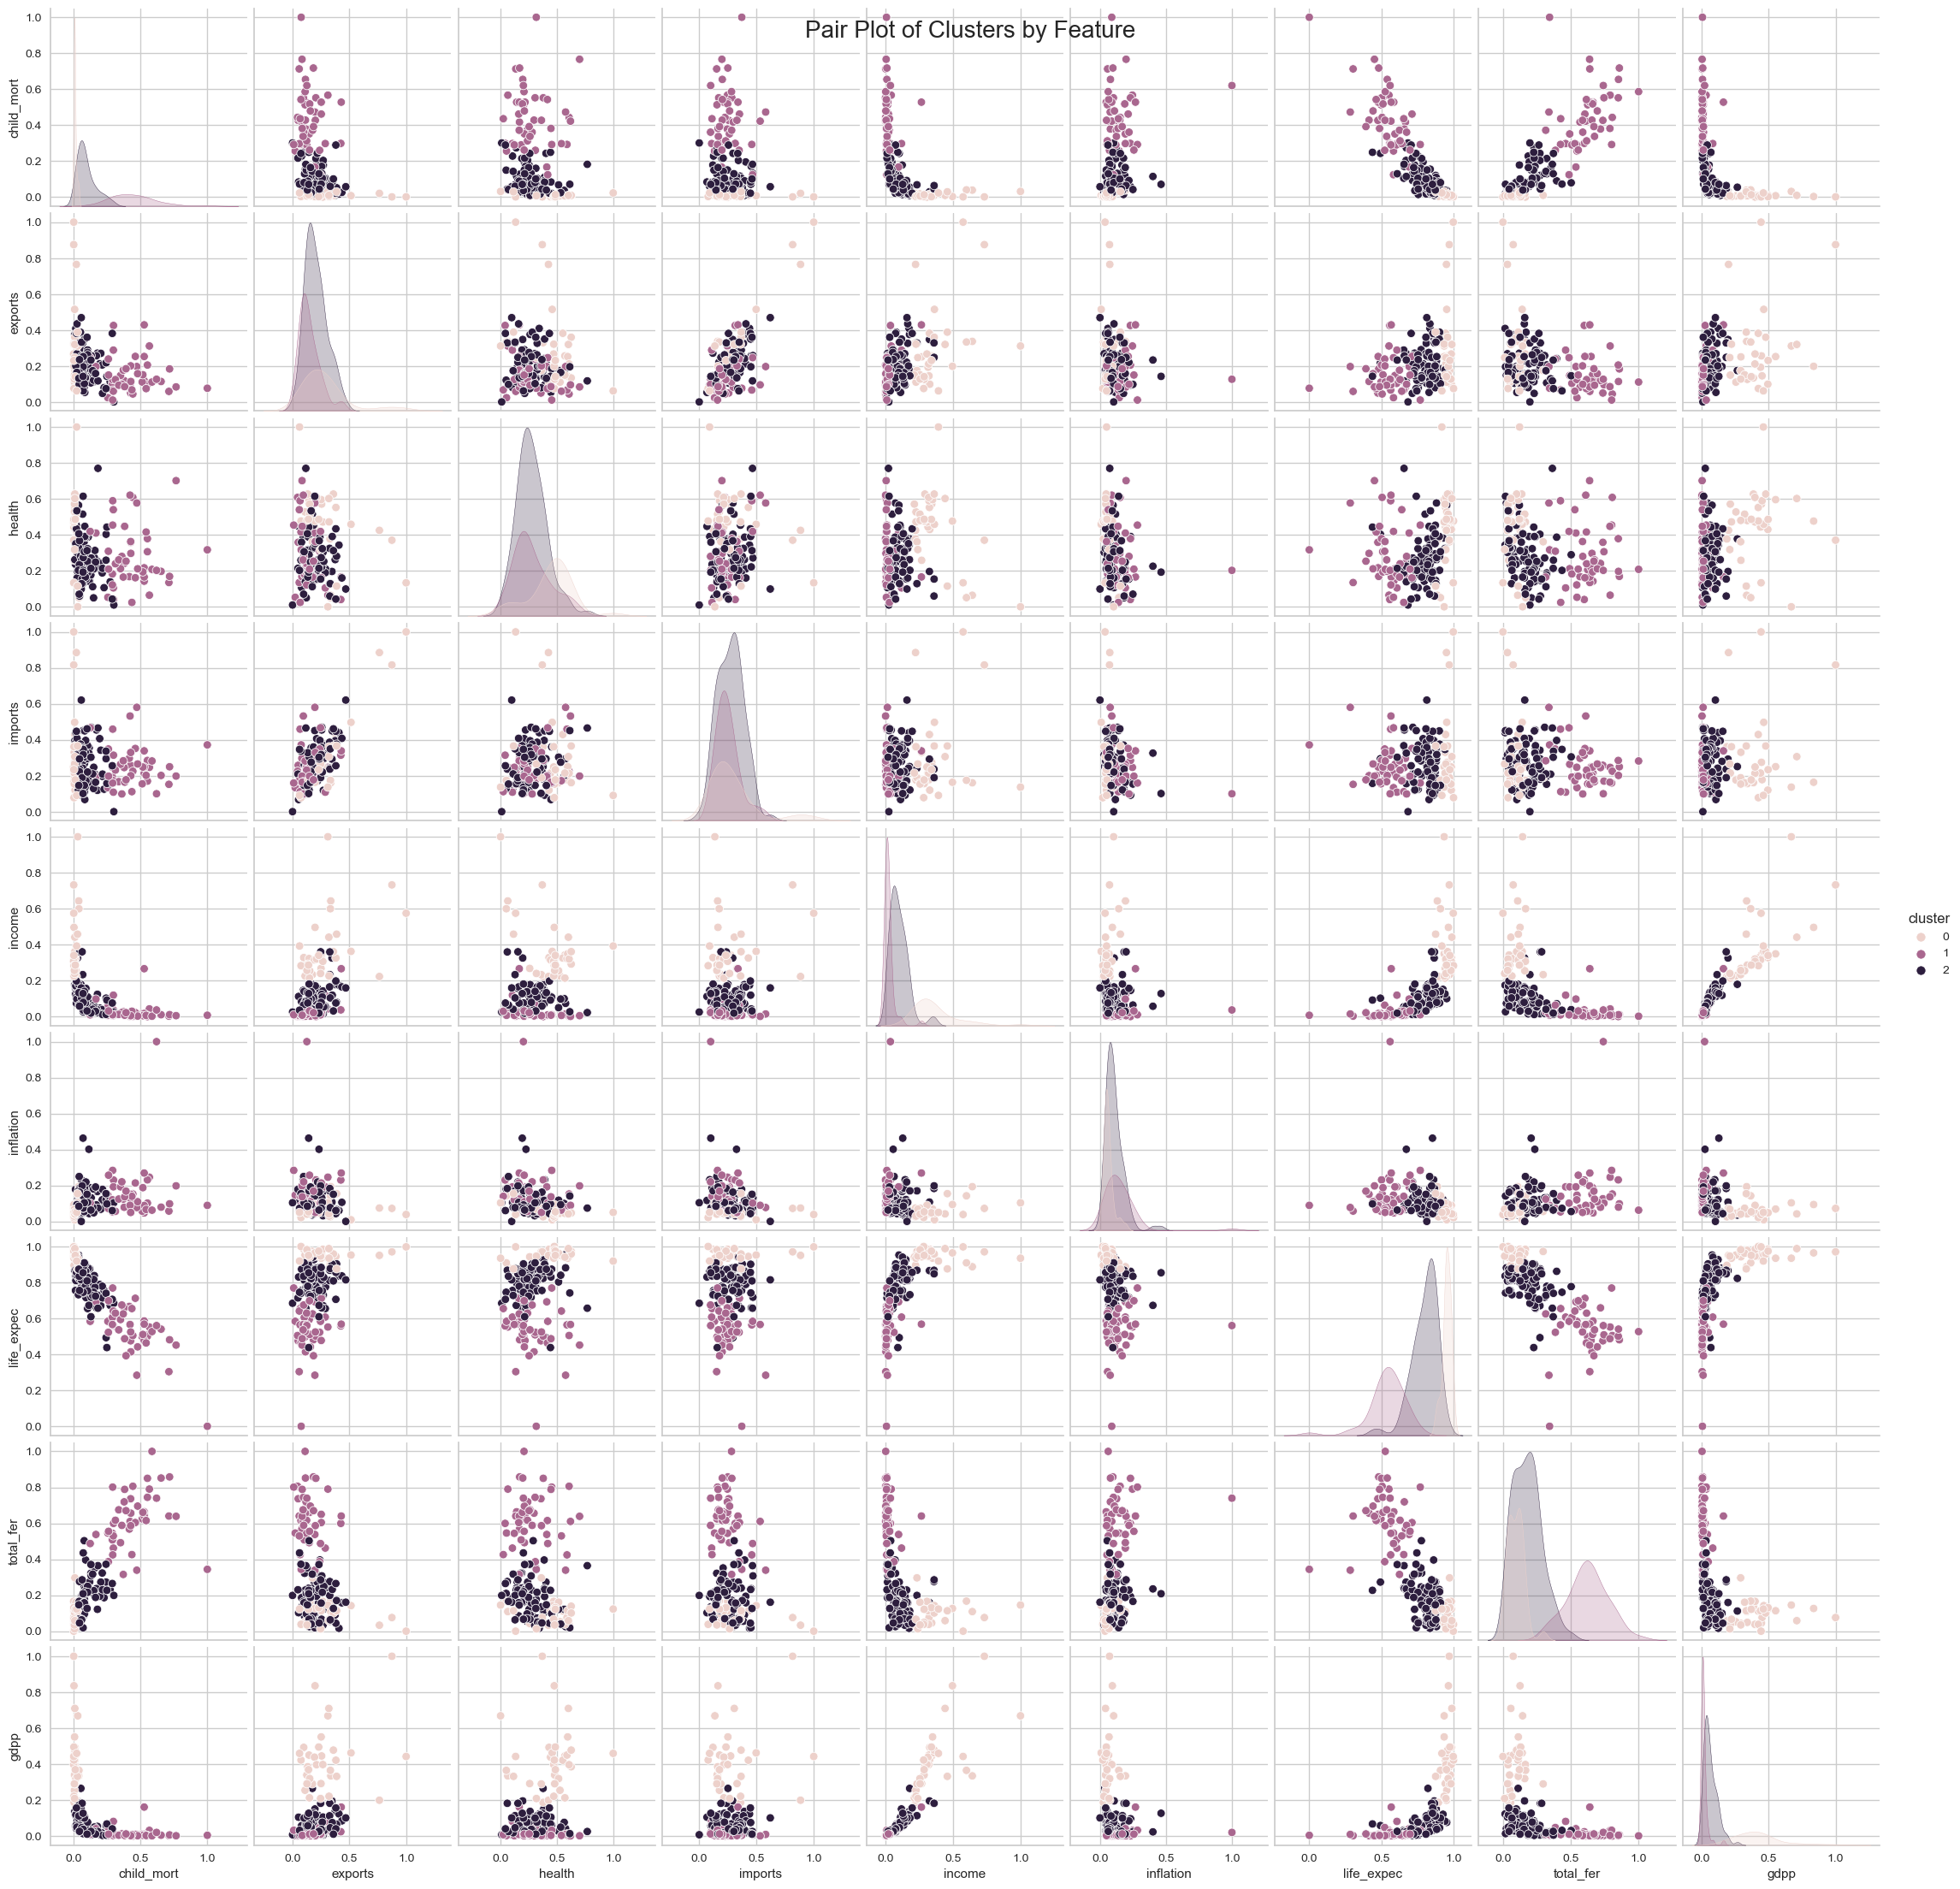

In [391]:
# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(df_minmax, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

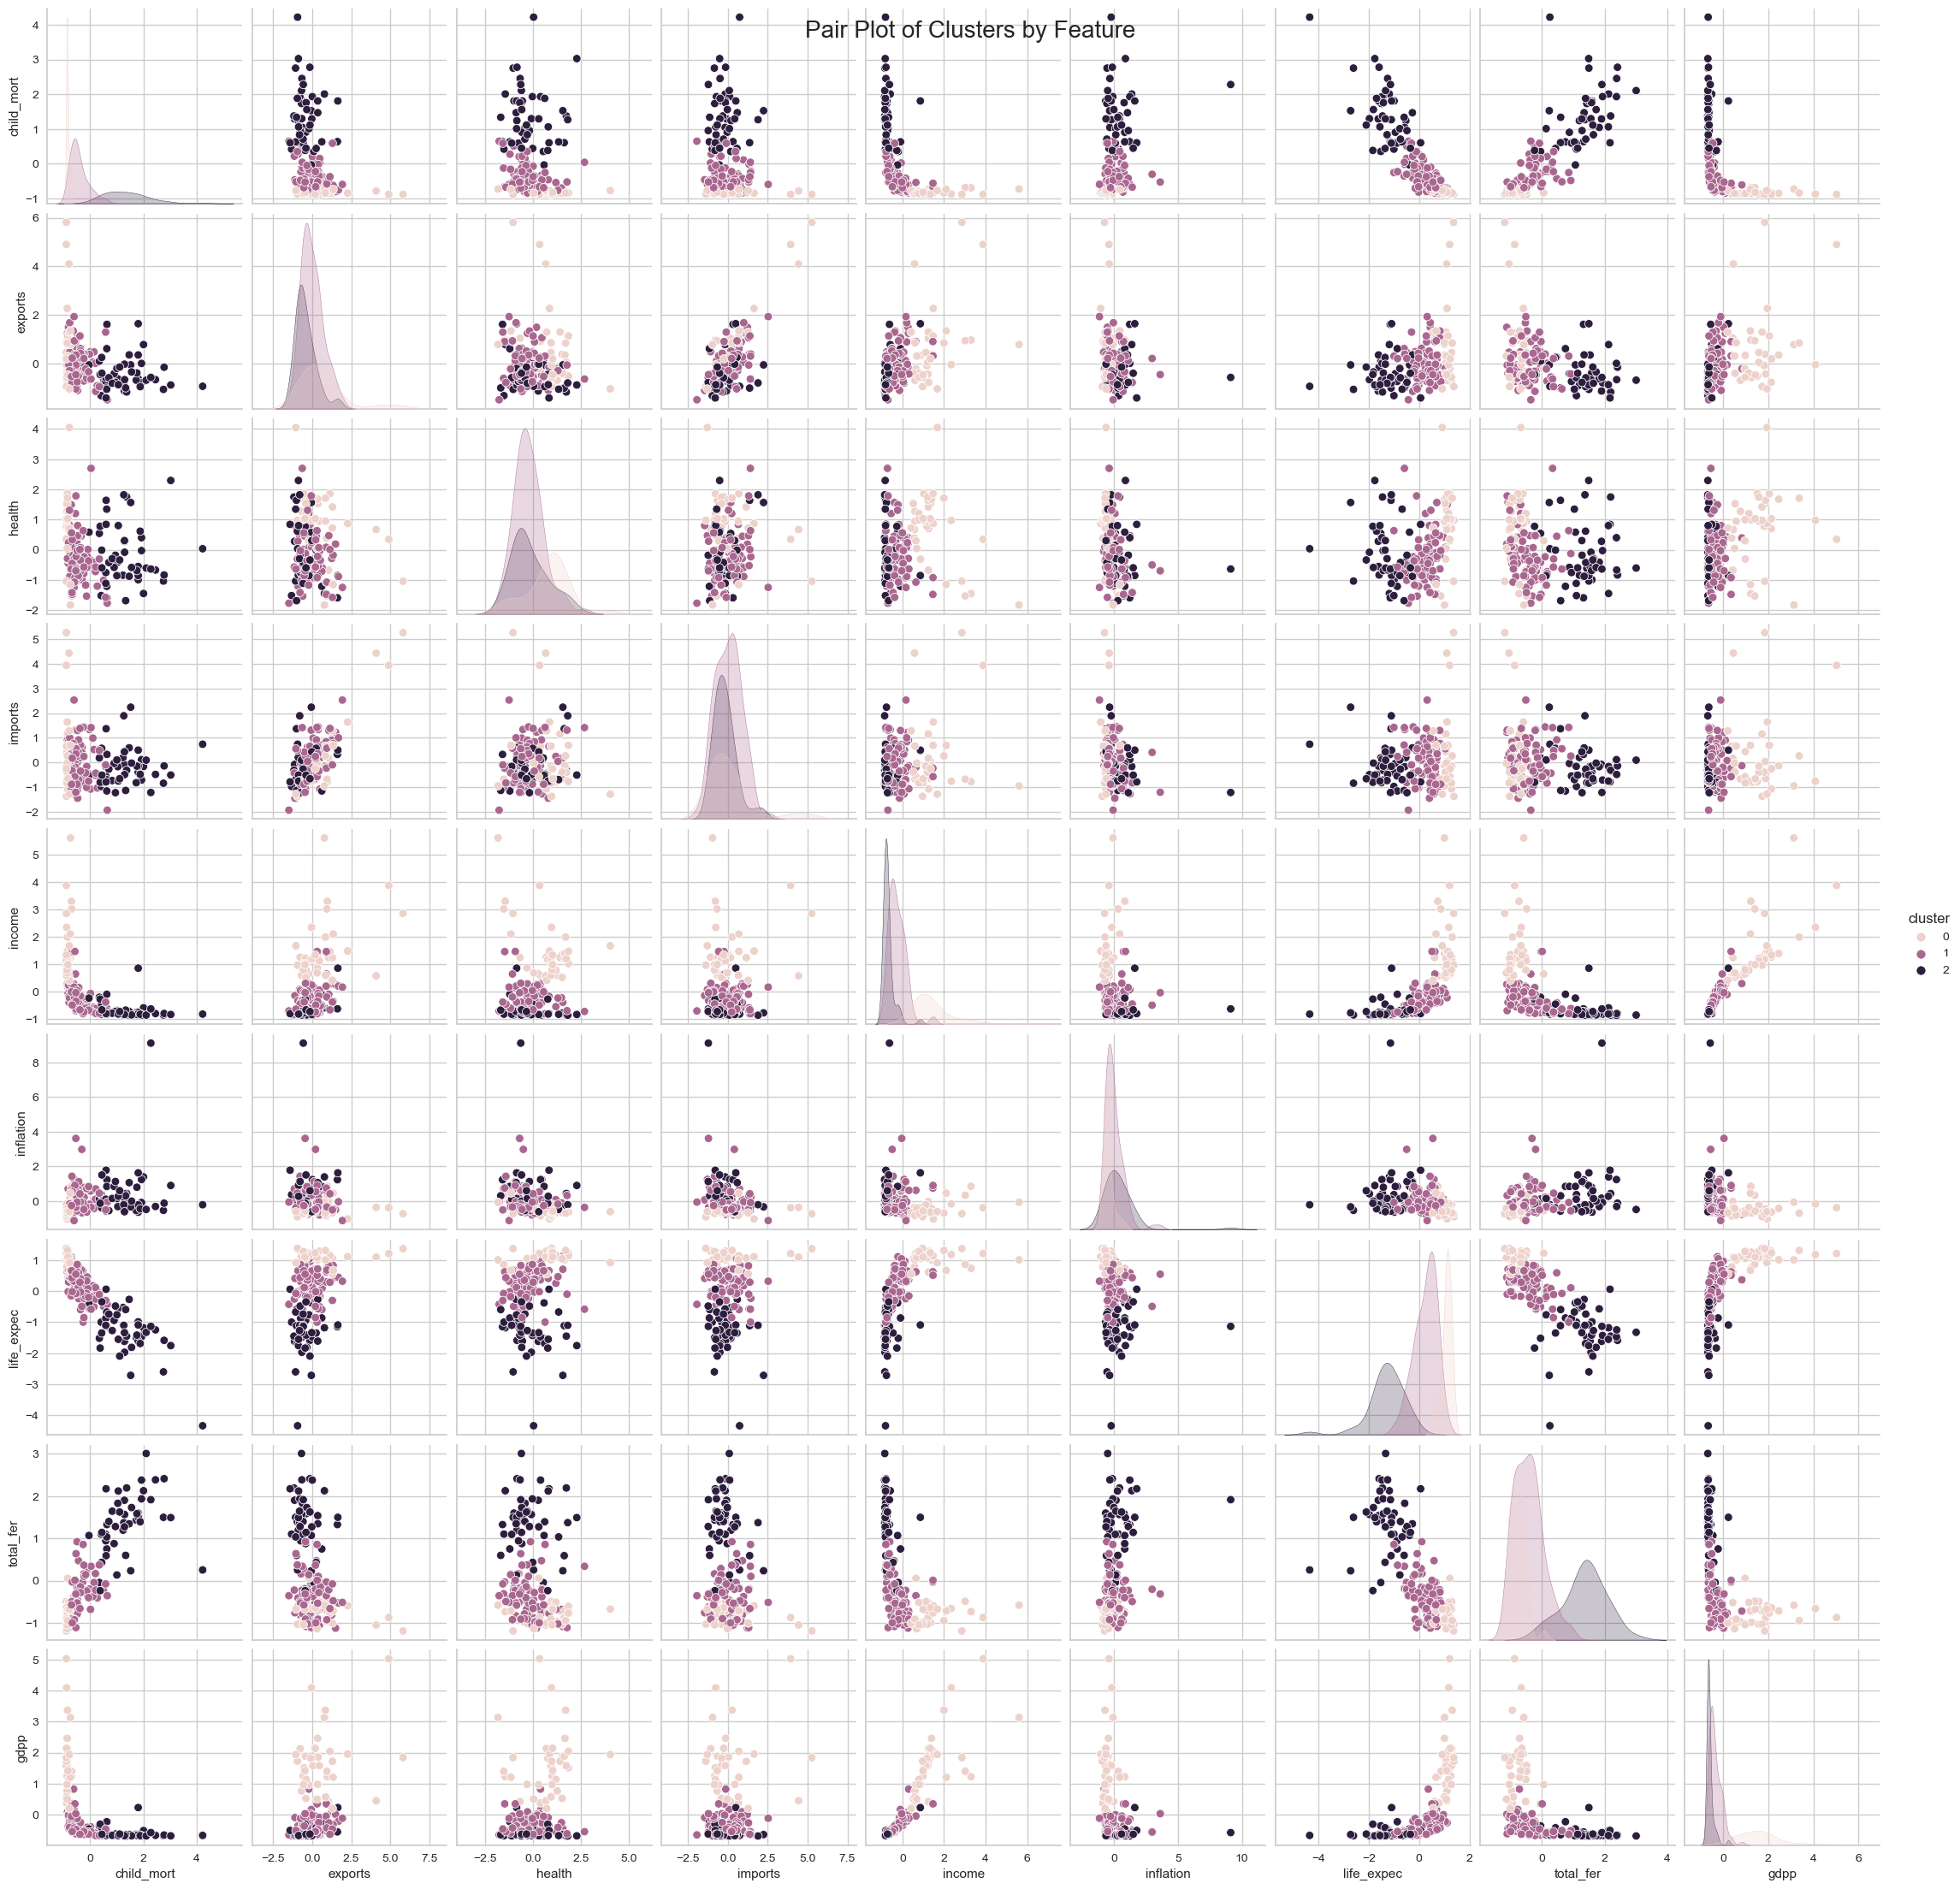

In [392]:
# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(df_standard, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

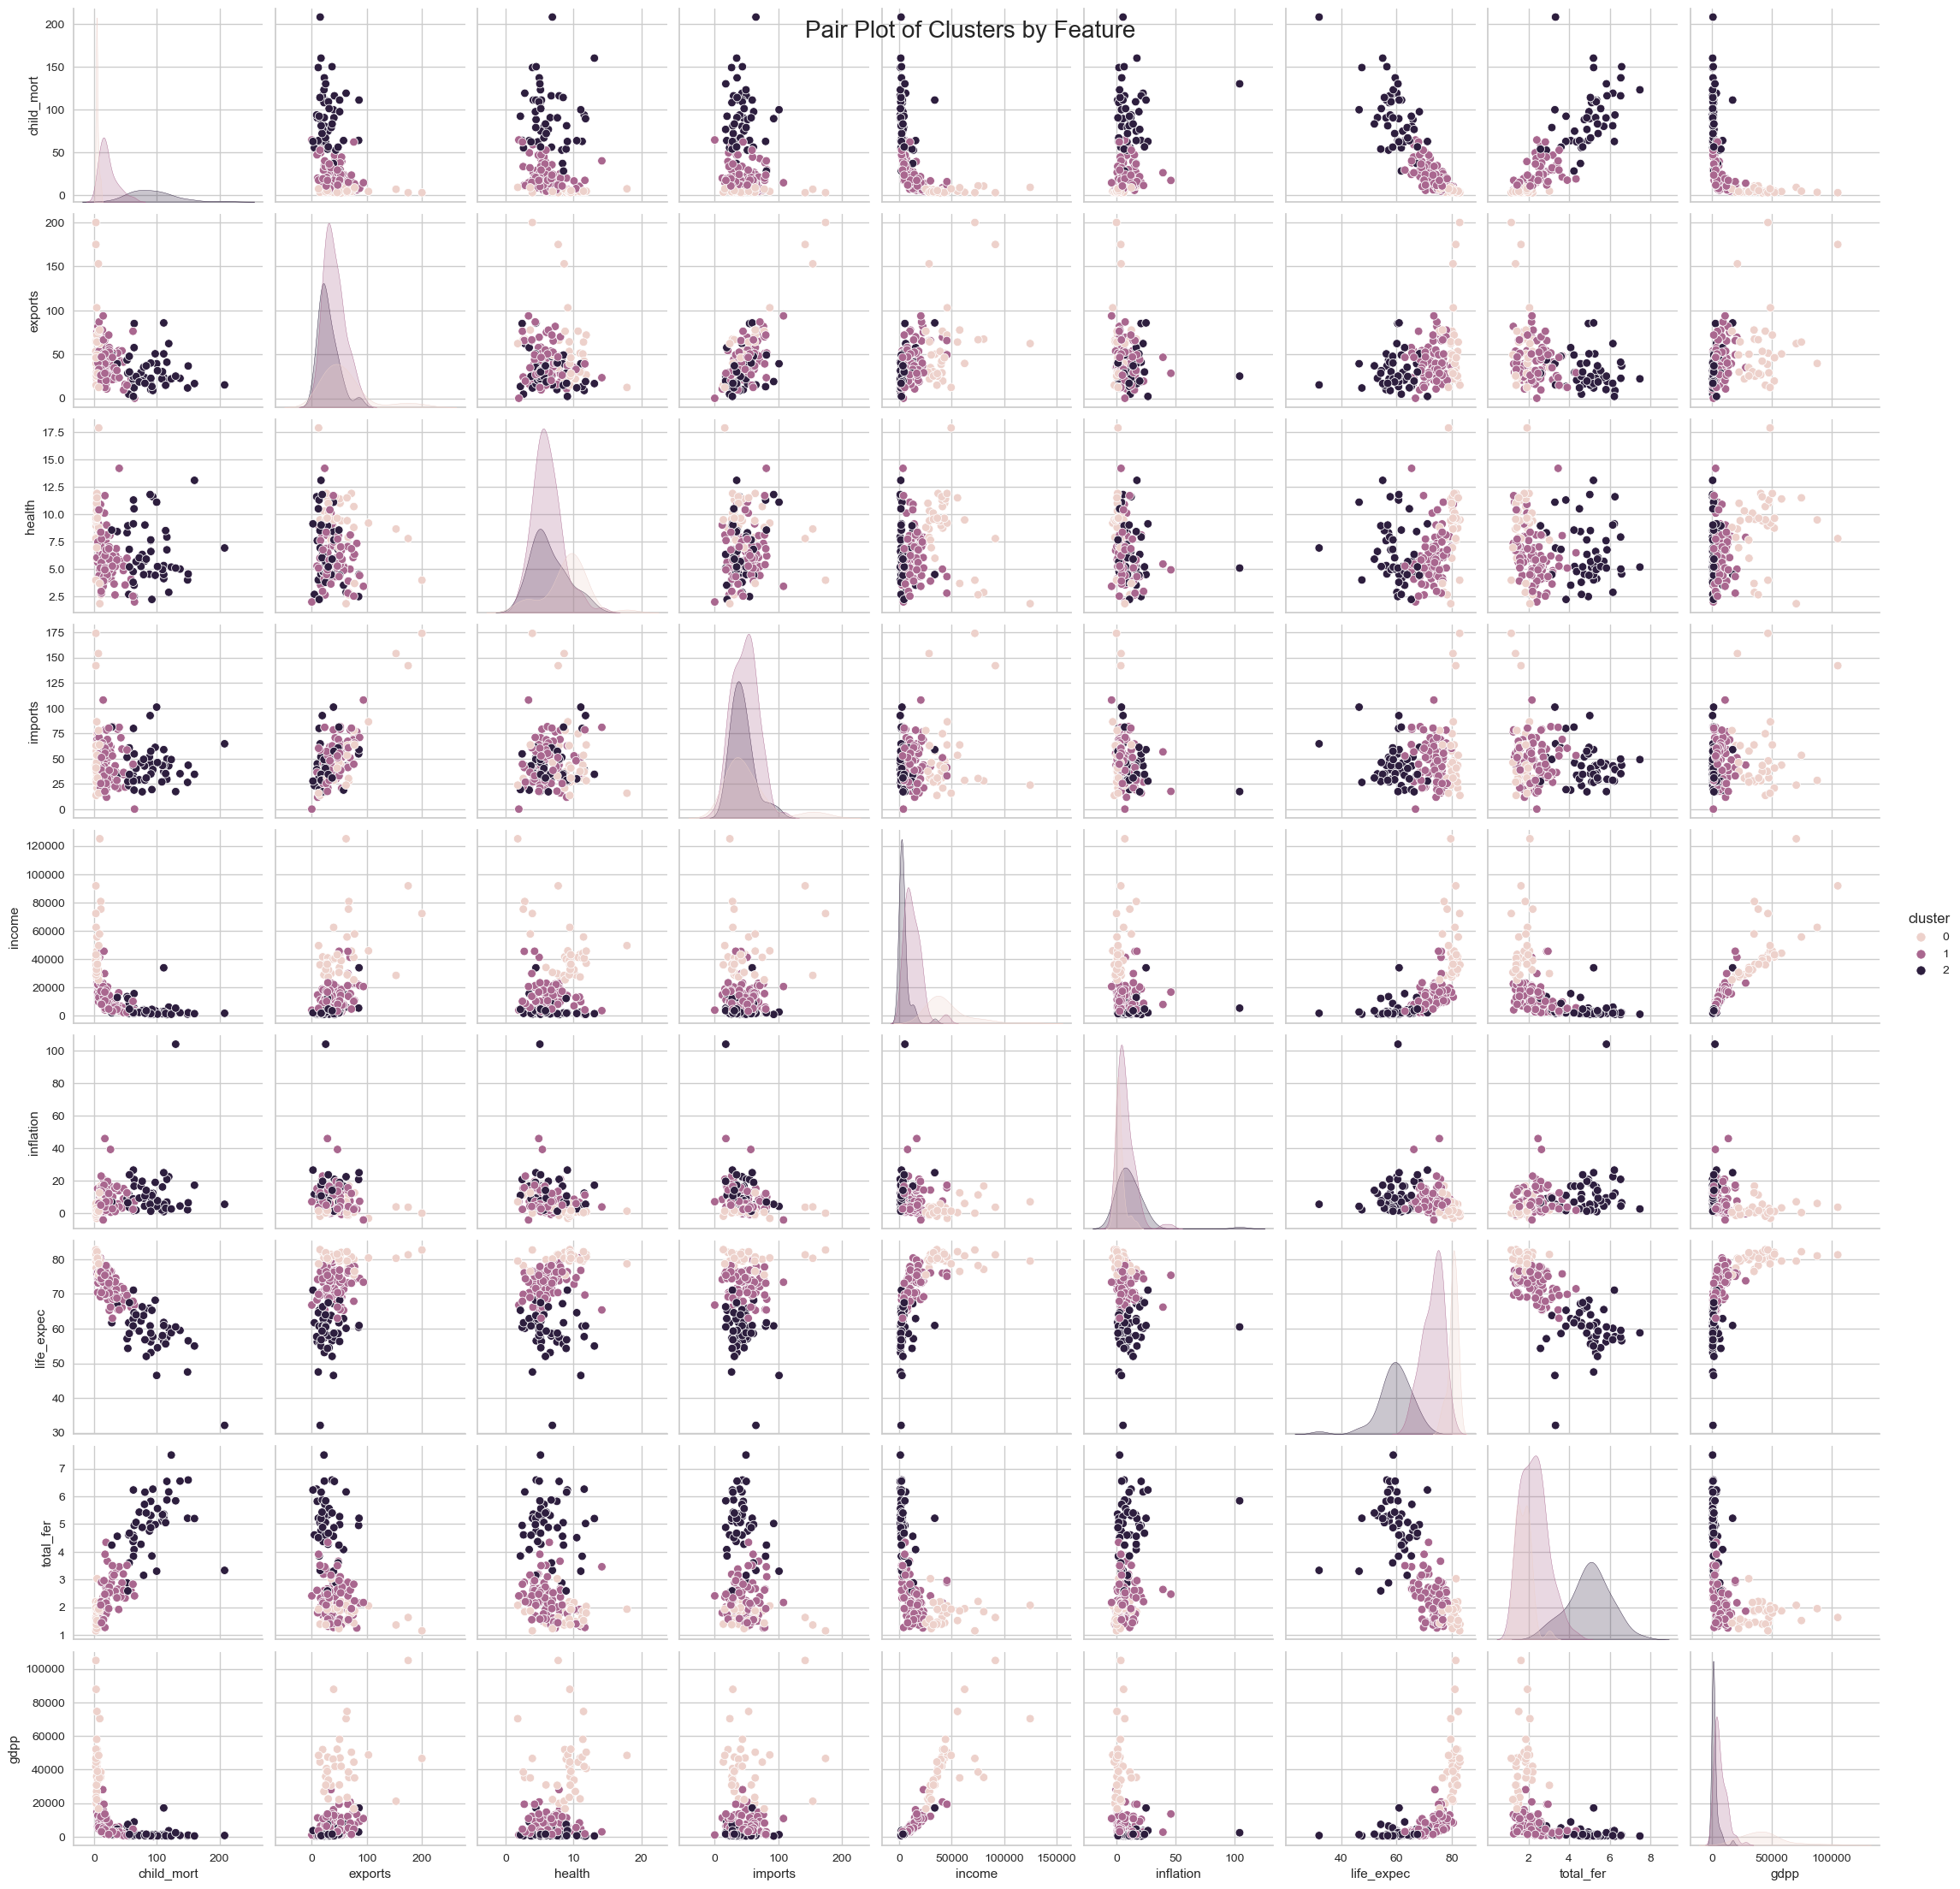

In [393]:
# load example dataset from seaborn 
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(data, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Cluster descriptions

In [403]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  cluster cluster_label  
0         9.44       56.20       5.82    553        2     Cluster_2  
1         4.49       76.30       1.65   4090        1     Cluster_1  
2        16.10       76.50       2.89   4460        1     Cluster_1  
3        22.40       60.10       6.16   3530        2     Cluster_2  
4         1.44       76.80       2.13  12200        1     Cluster_1  
..         ...         ...        ...    ...      ...           ...  
162       2.62       63.00       3.50   2970        1     Cluster_1  
163      45.90       75.40       2.47  13500        1     Cluster_1  
164      12.10       73.10       1.95   1310        1     Cluster_1  
165      23.60       67.50       4.67   1310        2     Cluster_2  
166      14.00       52.00       5.40   1460        2     Cluster_2  

[167 rows x 12 columns]

In [395]:
# Checking the mean values of features for each cluster
cluster_summary = data_numerical.groupby('cluster').mean()
cluster_summary

child_mort  exports  health  imports   income  inflation  life_expec  \
cluster                                                                         
0              4.90    58.43    8.92    51.51 45802.86       2.53       80.25   
1             21.70    40.48    6.16    47.11 12773.69       7.61       72.98   
2             91.61    29.57    6.43    43.13  3897.35      11.91       59.24   

         total_fer     gdpp  
cluster                      
0             1.74 43117.14  
1             2.28  6717.52  
2             4.99  1909.21

In [405]:
# MAP

data['cluster'].loc[data['cluster'] == 0] = 'No Help Needed'
data['cluster'].loc[data['cluster'] == 2] = 'Help Needed'
data['cluster'].loc[data['cluster'] == 1] = 'Might Need Help'

fig = px.choropleth(data[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data['cluster'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [397]:
# Listing the countries in each cluster
countries_in_clusters = data.groupby('cluster')['country'].apply(list)

# Displaying the countries for each cluster
countries_in_clusters

cluster
0    [Australia, Austria, Belgium, Brunei, Canada, ...
1    [Albania, Algeria, Antigua and Barbuda, Argent...
2    [Afghanistan, Angola, Benin, Botswana, Burkina...
Name: country, dtype: object

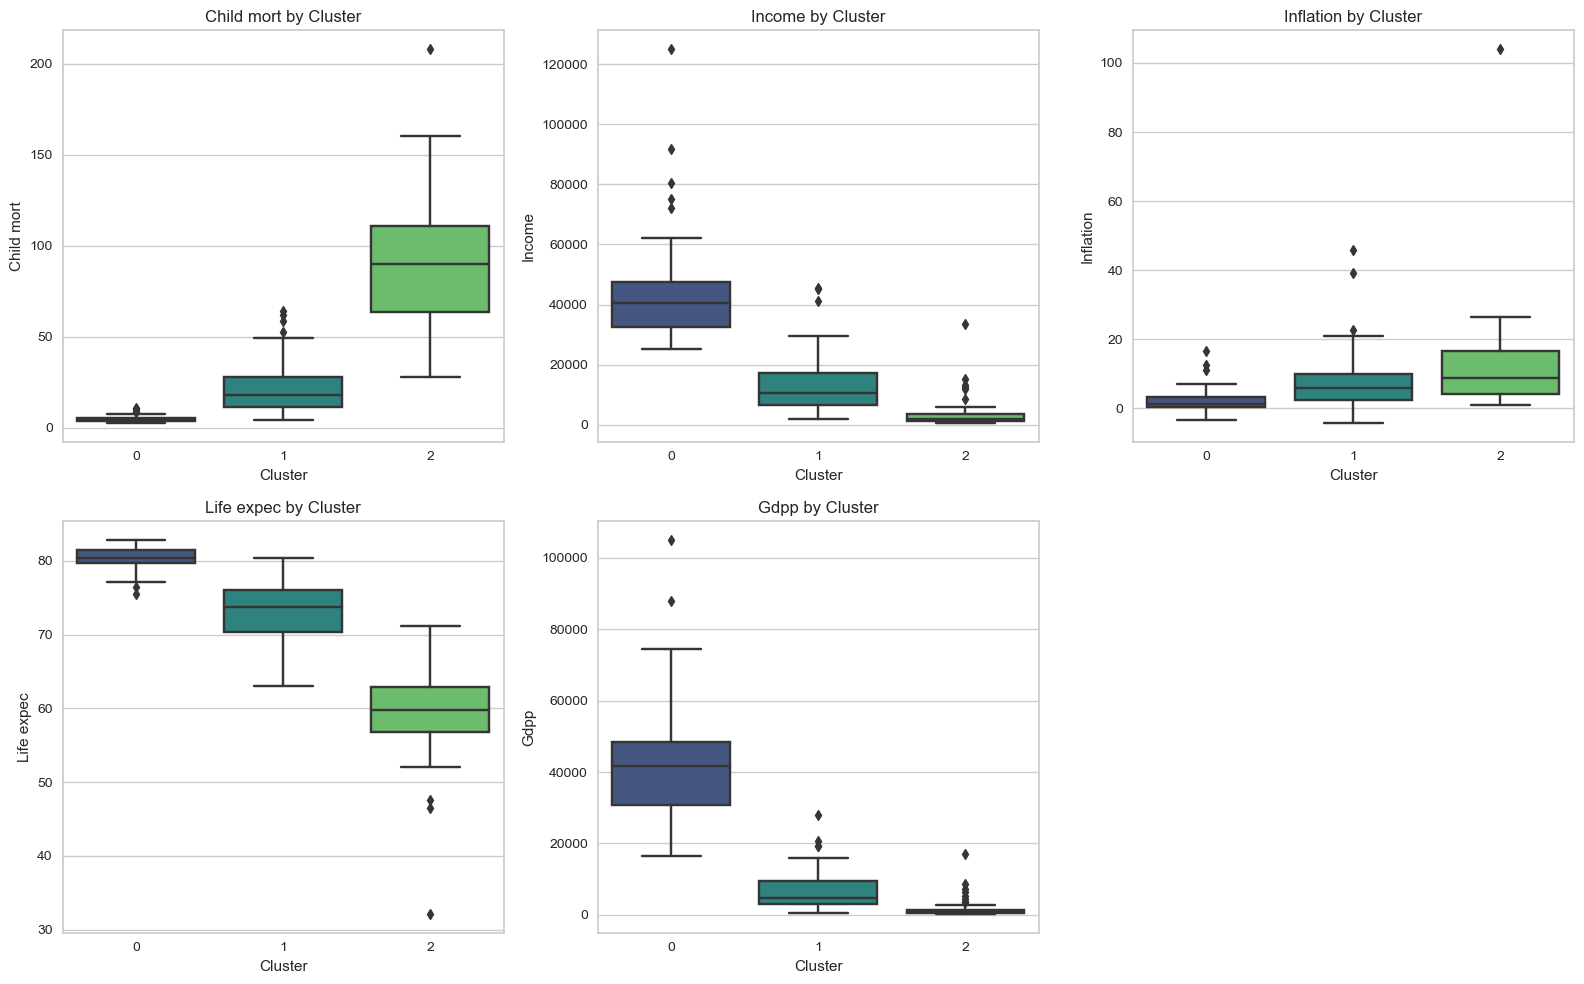

In [398]:
# Visualizing clusters for key variables
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(16, 10))

for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=variable, data=data, palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

#### Findings

Cluster 2 comprises countries primarily located in Africa and Asia, characterized by the higher child mortality rates and the lower levels of economic development.

Cluster 1 consists of countries distributed across South America, parts of Africa, Europe, and Asia. These countries exhibit average values across all features compared to other clusters.

Cluster 0 includes countries mainly located in North America, Europe, Oceania, and a few in Asia. These countries demonstrate strong or positive indicators such as robust economic development, higher life expectancy, and lower child mortality rates.

Blank spaces, such as Mexico, indicate countries with no available data.